In [388]:
import pandas as pd
import numpy as np

train_titanic = pd.read_csv('/home/tuandinh/Desktop/ML and AI/Spaceship Titanic competiton/datasets/train.csv')
print(train_titanic.shape)
train_titanic.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [389]:
train_titanic["PassengerId"][1][5:]

'01'

In [390]:
train_titanic["Cabin"].value_counts()

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [391]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [392]:
train_titanic.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [393]:
train_titanic["Destination"].value_counts

<bound method IndexOpsMixin.value_counts of 0         TRAPPIST-1e
1         TRAPPIST-1e
2         TRAPPIST-1e
3         TRAPPIST-1e
4         TRAPPIST-1e
            ...      
8688      55 Cancri e
8689    PSO J318.5-22
8690      TRAPPIST-1e
8691      55 Cancri e
8692      TRAPPIST-1e
Name: Destination, Length: 8693, dtype: object>

In [394]:
train_titanic["Transported"].unique()

array([False,  True])

In [395]:
train_titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


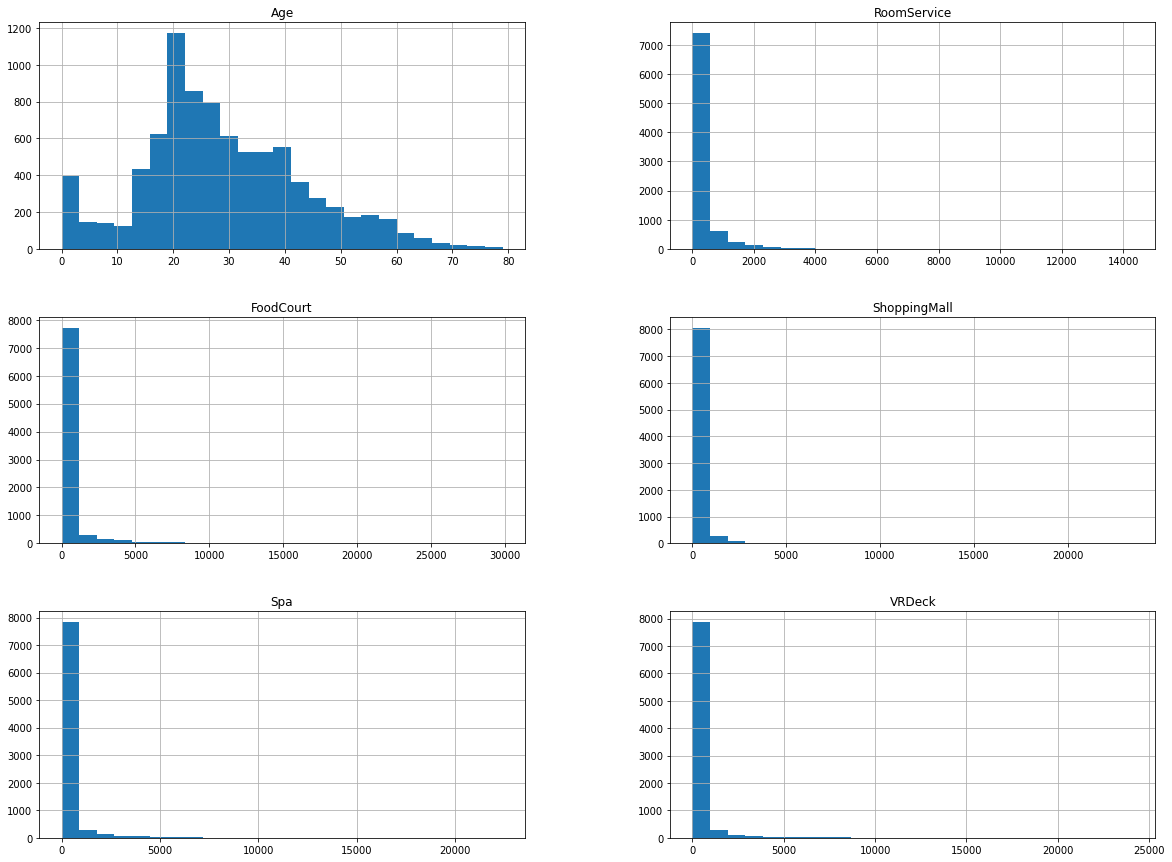

In [396]:
%matplotlib inline
import matplotlib.pyplot as plt

train_titanic.hist(bins=25, figsize=(20,15))
plt.show()

> Ta nhìn thấy dư liệu của 5 thuộc tính sau rất thiên vị, nó đặc trưng cho chi tiêu của cá nhân. Vì vậy theo tôi nên gọp chúng lại. Tôi sẽ  gộp 5 features này lại 

In [397]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Prepare data with numeric categories

In [398]:
attribs_num = ["Age","RoomService", "FoodCourt","ShoppingMall","Spa","VRDeck"]
train_titanic_num = train_titanic[attribs_num].copy()
train_titanic_num1 = train_titanic[attribs_num].copy()
print(train_titanic_num.head())
print(train_titanic_num.isnull().sum())

    Age  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck
0  39.0          0.0        0.0           0.0     0.0     0.0
1  24.0        109.0        9.0          25.0   549.0    44.0
2  58.0         43.0     3576.0           0.0  6715.0    49.0
3  33.0          0.0     1283.0         371.0  3329.0   193.0
4  16.0        303.0       70.0         151.0   565.0     2.0
Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64


In [399]:
train_titanic_num.values

array([[3.900e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [2.400e+01, 1.090e+02, 9.000e+00, 2.500e+01, 5.490e+02, 4.400e+01],
       [5.800e+01, 4.300e+01, 3.576e+03, 0.000e+00, 6.715e+03, 4.900e+01],
       ...,
       [2.600e+01, 0.000e+00, 0.000e+00, 1.872e+03, 1.000e+00, 0.000e+00],
       [3.200e+01, 0.000e+00, 1.049e+03, 0.000e+00, 3.530e+02, 3.235e+03],
       [4.400e+01, 1.260e+02, 4.688e+03, 0.000e+00, 0.000e+00, 1.200e+01]])

> + Đầu tiên chúng ta gộp tất cả các thuộc tính của liên quan đến số tiền người đó đã chi trả 
> + Because as we can see in the chart above, there is a very large bias for spending-related features alone, I think that affects my mmasy model later. (Vì như chúng ta thấy ở biểu đồ trên nêu để riêng các features liên quan đên chi tiêu thì có độ thiên lệch rất lớn, tôi nghĩ điều đó ảnh hưởng tới mô hình mmasy học của mình sau này.)

In [400]:
import math
a = math.nan
b = a + 1 
b

nan

> **nan + number = nan** 
> 
>  Ta ung dung vao ham duoi day de lu tru gia tri null khi gop du lieu

In [401]:
import math
from sklearn.base import BaseEstimator, TransformerMixin
array = np.zeros(len(train_titanic_num)) # mang mot cot toan so 0
attribs_spending_money = [1,2,3,4,5]
# roomservice_ix, foodcourt_ix, shopping_ix, spa_ix, vrCheck_ix = 1,2,3,4,5
def combine_spending_money_person(X):
        for ele in range(len(X)):
            for i in attribs_spending_money:
                if ~math.isnan(X[ele][i]):
                    array[ele] += (X[ele][i])
        return array
class CombineSpendingMoneyOfPerson(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        for ele in range(len(X)):
            for i in attribs_spending_money:
                if ~math.isnan(X[ele][i]):
                    array[ele] += (X[ele][i])
        return array

In [402]:
train_titanic_num["combine_spending_money_person"] = combine_spending_money_person(train_titanic_num.values)
train_titanic_num.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,combine_spending_money_person
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,736.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,10383.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,5176.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1091.0


In [403]:
train_titanic_num.isnull().sum()

Age                              179
RoomService                      181
FoodCourt                        183
ShoppingMall                     208
Spa                              183
VRDeck                           188
combine_spending_money_person    908
dtype: int64

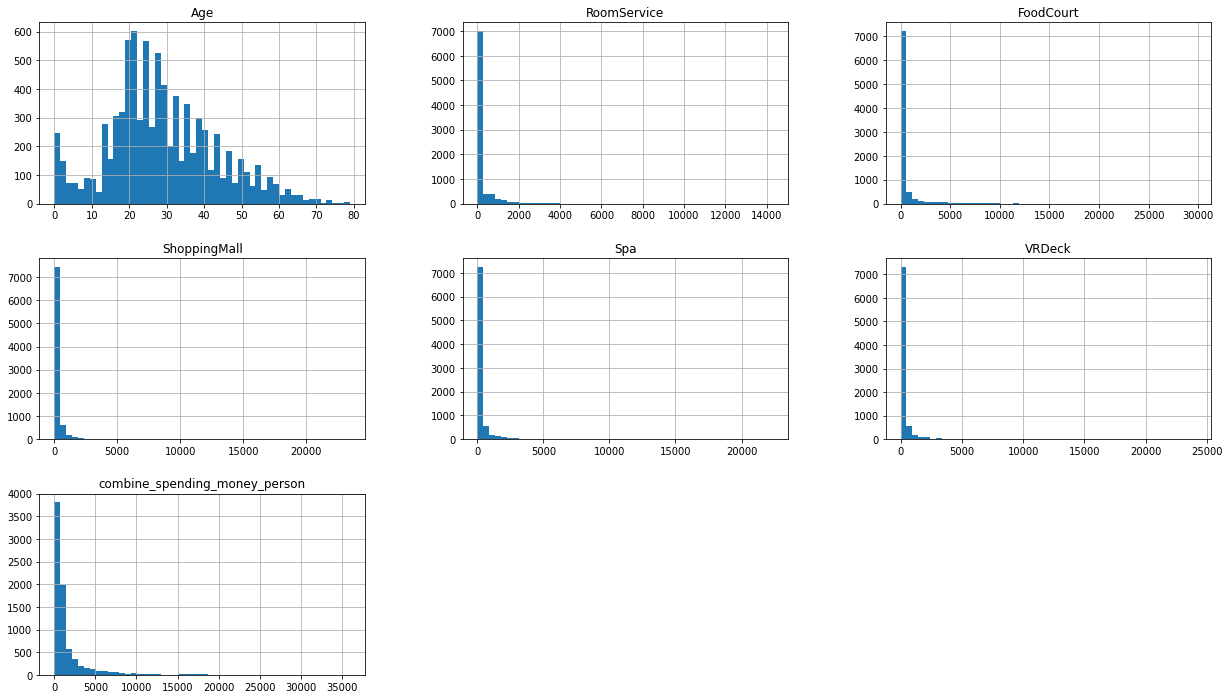

In [404]:
train_titanic_num.hist(bins=50, figsize=(21,12))
plt.show()

> + Xoá các cột có độ thiên lệch cao
> + Sau đó tôi dùng dữ liệu từ cột tổng chi tiêu để xử lí dữ liệu bị mất của mình

In [405]:
train_titanic_num = train_titanic_num.drop(["RoomService", "FoodCourt","ShoppingMall","Spa","VRDeck"], axis=1)
train_titanic_num.head()

,Age,combine_spending_money_person
0,39.0,0.0
1,24.0,736.0
2,58.0,10383.0
3,33.0,5176.0
4,16.0,1091.0


In [406]:
train_titanic_num = pd.DataFrame(train_titanic_num, columns=["Age","combine_spending_money_person"])
train_titanic_num.shape

(8693, 2)

In [407]:
train_titanic_num.isnull().sum()

Age                              179
combine_spending_money_person    908
dtype: int64

In [408]:
train_titanic_num.median()

Age                               27.0
combine_spending_money_person    736.0
dtype: float64

In [409]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

imputer = SimpleImputer(strategy='median')
imputer.fit(train_titanic_num)

SimpleImputer(strategy='median')

In [410]:
train_titanic_num.median().values

array([ 27., 736.])

In [411]:
train_titanic_num = imputer.transform(train_titanic_num)

In [412]:
train_titanic_num_with_spending_money = pd.DataFrame(train_titanic_num, columns=["Age", "combine_spending_money_person"])

In [413]:
train_titanic_num_with_spending_money.isnull().sum()

Age                              0
combine_spending_money_person    0
dtype: int64

In [418]:
'''
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

imputer = SimpleImputer()
num_pipeline = Pipeline([
    ('combine', CombineSpendingMoneyOfPerson() ),
    ('imputer', SimpleImputer(strategy='median')),
])
'''

"\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.pipeline import Pipeline\n\nimputer = SimpleImputer()\nnum_pipeline = Pipeline([\n    ('combine', CombineSpendingMoneyOfPerson() ),\n    ('imputer', SimpleImputer(strategy='median')),\n])\n"

In [417]:
# don't work
# num_pipeline.fit_transform(train_titanic_num1)

In [423]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,20)) # scaler 0 - > 20
train_titanic_num_prepared = scaler.fit_transform(train_titanic_num_with_spending_money)

In [424]:
train_titanic_num_prepared

array([[ 9.87341772,  0.        ],
       [ 6.07594937,  0.4090366 ],
       [14.6835443 ,  5.7704171 ],
       ...,
       [ 6.58227848,  1.04093145],
       [ 8.10126582,  2.57704171],
       [11.13924051,  2.68207964]])

### Prepeprocessing categorical features

In [426]:
train_titanic.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
cat_attribs = ["HomePlane","Cabin", "Destination", "Name"]